# Step 3: Exploratory Data Analysis

## 1. Introduction

   ***Project Goal:*** To develop a model that can predict the number of awards per 100 Full-Time Undergraduates with high accuracy.

   ***Target Variable:*** awards_per_value.

## 2. Imported Packages and Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import missingno as msno
import warnings  
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings(action="ignore", module="scipy")

## 3. Load Data

In [2]:
data = pd.read_csv('collegedata.csv')

In [3]:
data.shape

(3798, 44)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   unitid                  3798 non-null   int64  
 1   chronname               3798 non-null   object 
 2   city                    3798 non-null   object 
 3   state                   3798 non-null   object 
 4   level                   3798 non-null   object 
 5   control                 3798 non-null   object 
 6   basic                   3798 non-null   object 
 7   hbcu                    3798 non-null   object 
 8   flagship                3798 non-null   object 
 9   long_x                  3798 non-null   float64
 10  lat_y                   3798 non-null   float64
 11  site                    3798 non-null   object 
 12  student_count           3798 non-null   int64  
 13  awards_per_value        3798 non-null   float64
 14  awards_per_state_value  3798 non-null   

In [5]:
#Exclude some features from the dataframe
features_to_exclude = ['unitid', 'long_x', 'lat_y', 'site']

#Create a new DataFrame
data_filtered = data.drop(columns=features_to_exclude)
print(data_filtered.shape)

(3798, 40)


## 4. Non-numerical Features

In [6]:
#Identify columns with 'obect' datatype
cols = data_filtered.select_dtypes('object').columns.tolist()
print(cols)

['chronname', 'city', 'state', 'level', 'control', 'basic', 'hbcu', 'flagship']


In [7]:
df = data_filtered.select_dtypes('object')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   chronname  3798 non-null   object
 1   city       3798 non-null   object
 2   state      3798 non-null   object
 3   level      3798 non-null   object
 4   control    3798 non-null   object
 5   basic      3798 non-null   object
 6   hbcu       3798 non-null   object
 7   flagship   3798 non-null   object
dtypes: object(8)
memory usage: 237.5+ KB
None


In [8]:
#Count the number of institutions without duplicate names
print(df['chronname'].nunique())

3793


Even though there are no duplicates in the dataframe as evidenced during data wrangling, there seems to be duplicate names. Let us explore further.

In [9]:
#Print institutions with duplicate names.
duplicate_names = df[df.duplicated(subset=['chronname'])]
print(duplicate_names.iloc[:, :5].to_string(index=False)) #Exclude the index from the print out

                      chronname           city       state  level            control
         Metro Business College Jefferson City    Missouri 2-year Private for-profit
ITT Technical Institute-Madison        Madison   Wisconsin 4-year Private for-profit
         Metro Business College         Arnold    Missouri 2-year Private for-profit
ITT Technical Institute-Madison        Madison Mississippi 2-year Private for-profit
                Anamarc College   Santa Teresa  New Mexico 4-year Private for-profit


As we can see, those are all different institutions.

In [10]:
print(df['city'].nunique())

1787


In [11]:
#Display the unique institutional names
print(df['city'].unique())

['Normal' 'Birmingham' 'Montgomery' ... 'Baraga' 'Escondido' 'Edina']


Let us explore further if 'Normal' is a city name. It appears tht there are two cities in different States that are called 'Normal'.

In [12]:
#Select institutions with a city called 'Normal'.
print(df[df['city'] == 'Normal'].to_string(index=False))

                  chronname   city    state  level control                                              basic hbcu flagship
     Alabama A&M University Normal  Alabama 4-year  Public Masters Colleges and Universities--larger programs    X       no
  Illinois State University Normal Illinois 4-year  Public                     Doctoral/Research Universities   no       no
Heartland Community College Normal Illinois 2-year  Public             Associates--Public Rural-serving Large   no       no


**It is confirmed, there is a city called Normal in Alabama and in Illinois.**

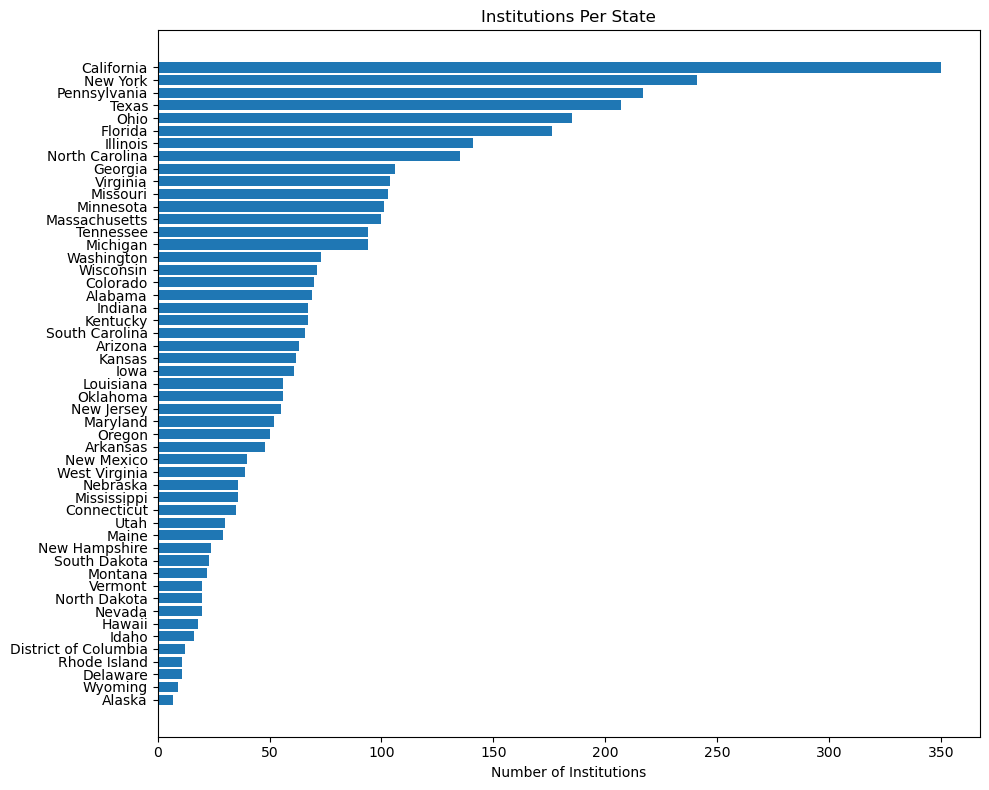

In [13]:
#Count and sort the number of institutions per state
chronname_counts = df.groupby('state')['chronname'].count().sort_values()

#Visualize using a horizontal bar graph
plt.figure(figsize=(10, 8))
plt.barh(chronname_counts.index, chronname_counts.values)
plt.xlabel('Number of Institutions')
plt.title('Institutions Per State')
plt.tight_layout()
plt.show();

California has the highest (350) number of institutions in the dataset. New York, Pennslyvannia, and Texas have atleast 200 institutions. District of Columbia, Rhode Island, Delaware, Wyoming, and Alaska have the lowest number of institutions.

In [14]:
print(df['level'].unique())

['4-year' '2-year']


In [15]:
df['level'].describe()

count       3798
unique         2
top       4-year
freq        2339
Name: level, dtype: object

   - There are 2339 4-year public and private institutions.
   - The rest are 2-year public or private institutions.

**The distribution of 4-year and 2-year institutions in every state is shown below.**

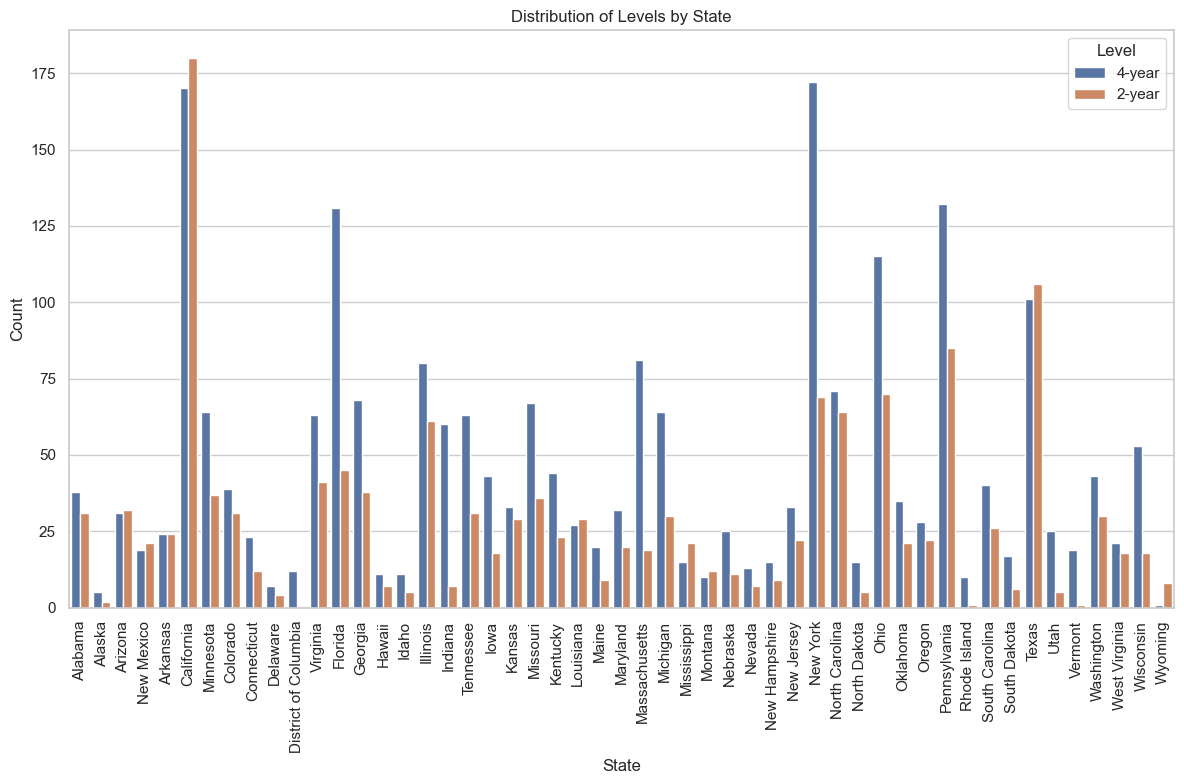

In [16]:
sns.set(style='whitegrid')
plt.figure(figsize=(12,8))
#Create a plot
sns.countplot(data=df, x='state', hue='level')

#Display the plot
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Distribution of Levels by State')
plt.legend(title='Level', loc='upper right')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show();

- NY and CA have the highest number 4-year institutions.
- CA has, by far, the highest number of 2-year institutions.
- No 2-year institutions reported from the District of Columbia.
- Rhode Island, Vermont, and Alaska have few reported 2-year institutions.
- Wyoming has the lowest number of 4-year institutions recorded.

In [17]:
#Identify the labels in the 'control' feature
df['control'].unique()

array(['Public', 'Private not-for-profit', 'Private for-profit'],
      dtype=object)

In [18]:
print(df['control'].describe())

count       3798
unique         3
top       Public
freq        1558
Name: control, dtype: object


- There are more Public institutions than Private ones.

**Visualize the distribution of Public, Private not-for-profit, and Private_for-profit institutions in each State.**

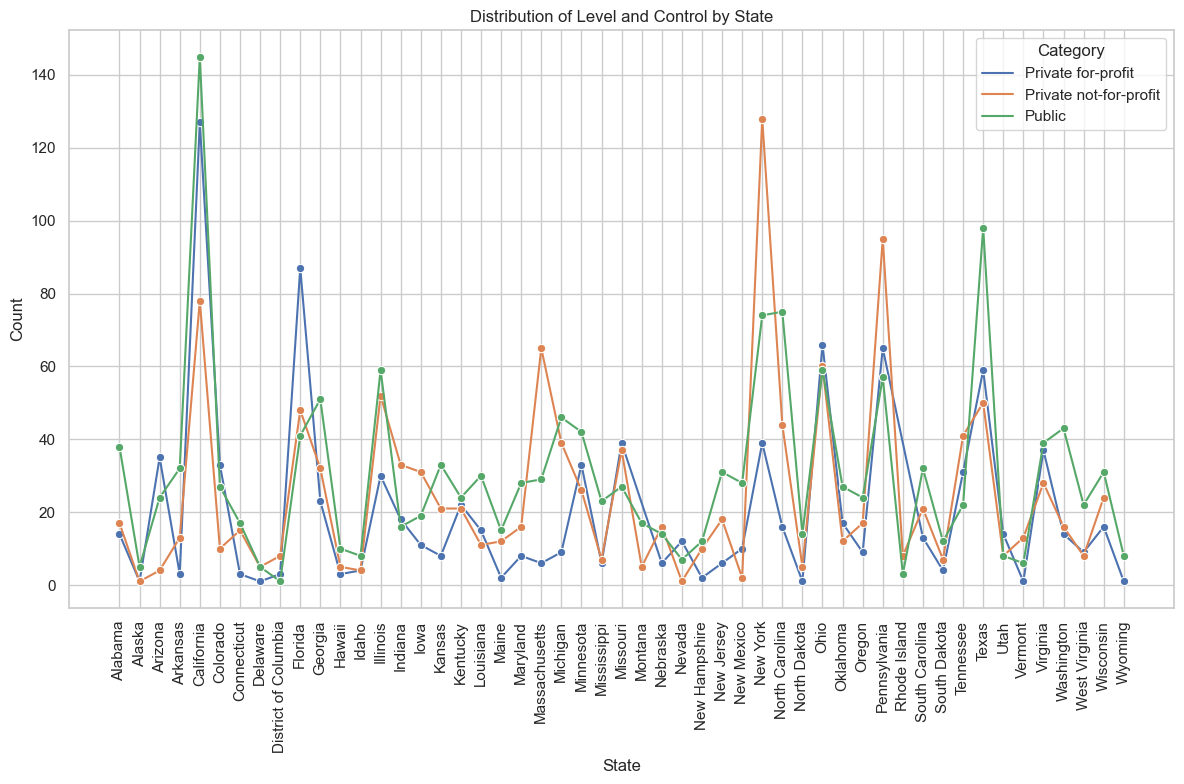

In [19]:
#Group the data per state and control features
grp_data = df.groupby(['state', 'control']).size().reset_index(name='count')

# Create line plots
plt.figure(figsize=(12, 8))

#Create lineplots based on the grouped data
sns.lineplot(x='state', y='count', hue='control', data=grp_data, marker='o')

plt.xlabel('State')
plt.ylabel('Count')
plt.title('Distribution of Level and Control by State')
plt.legend(title='Category')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show();

- The above lineplot is in agreement with the ealier countplot regarding the distribution of various institutions across the States.

In [20]:
print(df['basic'].value_counts())

basic
Associates--Private For-profit                                                  517
Masters Colleges and Universities--larger programs                              386
Baccalaureate Colleges--Diverse Fields                                          343
Associates--Public Rural-serving Medium                                         289
Baccalaureate Colleges--Arts & Sciences                                         252
Masters Colleges and Universities--medium programs                              169
Associates--Public Rural-serving Large                                          128
Associates--Public Urban-serving Multicampus                                    125
Baccalaureate/Associates Colleges                                               124
Schools of art- music- and design                                               114
Associates--Public Rural-serving Small                                          111
Associates--Public Suburban-serving Single Campus                     

In [21]:
print(df['hbcu'].value_counts())

hbcu
no    3704
X       94
Name: count, dtype: int64


In [22]:
#Rename the label 'X' to 'yes'
df['hbcu'] = df['hbcu'].replace('X', 'yes')

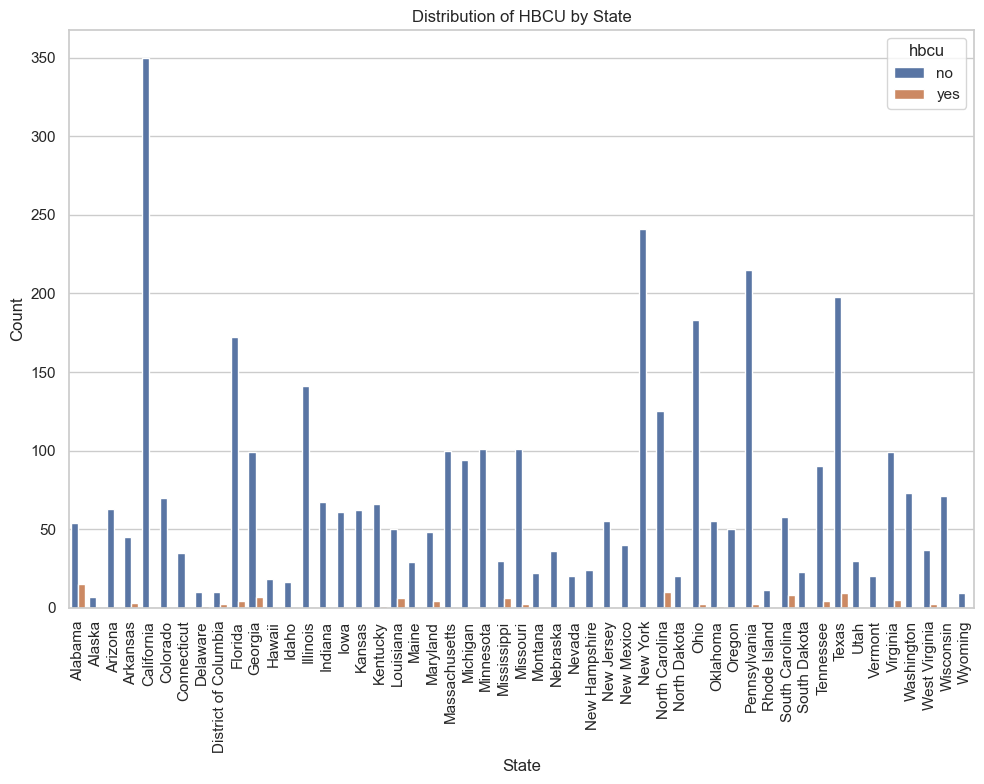

In [23]:
g_data=df.groupby(['state', 'hbcu']).size().reset_index(name='count')
plt.figure(figsize=(10, 8))
sns.barplot(x='state', y='count', data=g_data, hue='hbcu')
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Distribution of HBCU by State')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show();

In [24]:
print(df['flagship'].value_counts())

flagship
no    3748
X       50
Name: count, dtype: int64


In [25]:
#Rename the label 'X' to 'yes'
df['flagship'] = df['flagship'].replace('X', 'yes')

In [26]:
state_flagship_hbcu = df.groupby(by='state')[['hbcu', 'flagship']].value_counts().unstack(fill_value=0)
state_flagship_hbcu.head(20)

flagship                    no  yes
state                hbcu          
Alabama              no     53    1
                     yes    15    0
Alaska               no      6    1
Arizona              no     62    1
Arkansas             no     44    1
                     yes     3    0
California           no    349    1
Colorado             no     69    1
Connecticut          no     34    1
Delaware             no      9    1
                     yes     1    0
District of Columbia no     10    0
                     yes     2    0
Florida              no    171    1
                     yes     4    0
Georgia              no     98    1
                     yes     7    0
Hawaii               no     17    1
Idaho                no     15    1
Illinois             no    140    1

## Numerical Columns

In [27]:
df_num = data_filtered.select_dtypes('number')
df_num.head()

student_count  awards_per_value  awards_per_state_value  \
0           4051              14.2                    18.8   
1          11502              20.9                    18.8   
2            322              29.9                    17.8   
3           5696              20.9                    18.8   
4           5356              11.6                    18.8   

   awards_per_natl_value  exp_award_value  exp_award_state_value  \
0                   21.5           105331                  75743   
1                   21.5           136546                  75743   
2                   22.5            58414                  92268   
3                   21.5            64418                  75743   
4                   21.5           132407                  75743   

   exp_award_natl_value  exp_award_percentile  ft_pct  fte_value  ...  \
0                 66436                    90    93.8       3906  ...   
1                 66436                    97    72.7      10032  ...   
2                101725                    30    62.7        294  ...   
3                 66436                    61    74.4       5000  ...   
4                 66436                    96    91.0       5035  ...   

   pell_percentile  retain_value  retain_percentile  ft_fac_value  \
0             98.0          63.1               17.0          82.8   
1             39.0          80.2               70.0          92.4   
2             91.0          37.5                2.0          67.2   
3             32.0          81.0               72.0          65.5   
4            100.0          62.2               15.0          67.0   

   ft_fac_percentile  state_sector_ct  carnegie_ct  counted_pct  cohort_size  \
0               89.0               13          386         99.7        882.0   
1               98.0               13          106         56.0       1376.0   
2               71.0               16          252        100.0          3.0   
3               56.0               13          106         43.1        759.0   
4               58.0               13          386         88.0       1351.0   

   num_similar  
0         20.0  
1         20.0  
2         20.0  
3         20.0  
4         20.0  

[5 rows x 32 columns]

In [28]:
df_num.describe().T

count          mean            std      min  \
student_count           3798.0   4476.135334    7376.868923     23.0   
awards_per_value        3798.0     23.435176      10.615140      0.5   
awards_per_state_value  3798.0     22.845656       6.322818      3.2   
awards_per_natl_value   3798.0     22.484044       4.770449     16.5   
exp_award_value         3798.0  65074.471827  107437.917345      0.0   
exp_award_state_value   3798.0  61282.189837   33295.027077  12346.0   
exp_award_natl_value    3798.0  60903.577672   29892.281333  24795.0   
exp_award_percentile    3798.0     49.919958      29.054686      0.0   
ft_pct                  3798.0     71.092198      25.043616      3.8   
fte_value               3798.0   3716.866772    5998.058385     33.0   
fte_percentile          3798.0     49.985519      28.929501      0.0   
med_sat_value           3798.0   1059.889304      78.785477    666.0   
med_sat_percentile      3798.0     49.801047      17.205975      0.0   
aid_value               3798.0   7960.445878    6418.812781    294.0   
aid_percentile          3798.0     49.991046      28.918855      0.0   
endow_value             3798.0  32544.046061   96435.045765      0.0   
endow_percentile        3798.0     49.948773      22.640350      0.0   
grad_100_value          3798.0     28.364465      22.273431      0.0   
grad_100_percentile     3798.0     46.728295      29.179907      0.0   
grad_150_value          3798.0     42.407586      22.414923      0.0   
grad_150_percentile     3798.0     48.859533      28.165640      0.0   
pell_value              3798.0     47.572057      20.062574      0.0   
pell_percentile         3798.0     49.895180      28.924467      0.0   
retain_value            3798.0     66.231853      16.433393      0.0   
retain_percentile       3798.0     49.226591      28.146703      0.0   
ft_fac_value            3798.0     45.107477      24.684536      0.0   
ft_fac_percentile       3798.0     49.473448      28.964490      0.0   
state_sector_ct         3798.0     34.284360      28.311303      1.0   
carnegie_ct             3798.0    232.557662     156.960653      1.0   
counted_pct             3798.0     57.675919      24.050427      0.0   
cohort_size             3798.0    658.306028     918.905577      1.0   
num_similar             3798.0     18.846761       4.662675      0.0   

                                 25%           50%            75%        max  
student_count             581.250000   1794.500000    5172.000000   170144.0  
awards_per_value           17.300000     21.300000      26.500000      137.6  
awards_per_state_value     19.300000     22.200000      24.200000       59.9  
awards_per_natl_value      21.500000     22.500000      24.600000       32.8  
exp_award_value         32311.250000  50578.500000   76930.250000  5282095.0  
exp_award_state_value   35830.000000  54025.000000   79310.000000   188870.0  
exp_award_natl_value    37780.000000  38763.000000  101725.000000   101725.0  
exp_award_percentile       25.000000     50.000000      75.000000      100.0  
ft_pct                     49.800000     76.950000      93.900000      100.0  
fte_value                 616.250000   1603.000000    4190.500000   126411.0  
fte_percentile             25.000000     50.000000      75.000000      100.0  
med_sat_value            1059.889304   1059.889304    1059.889304     1534.0  
med_sat_percentile         49.801047     49.801047      49.801047      100.0  
aid_value                4018.250000   5208.500000    9340.250000    41580.0  
aid_percentile             25.000000     50.000000      75.000000      100.0  
endow_value              3553.000000  28949.000000   32544.046061  2505435.0  
endow_percentile           41.000000     49.948773      59.000000      100.0  
grad_100_value             10.100000     25.700000      40.975000      100.0  
grad_100_percentile        22.000000     46.728295      71.000000      100.0  
grad_150_value             24.400000     42.407586      58.400000   

In [29]:
df_num.corr()

student_count  awards_per_value  \
student_count                1.000000         -0.195007   
awards_per_value            -0.195007          1.000000   
awards_per_state_value      -0.268093          0.547838   
awards_per_natl_value       -0.310766          0.488051   
exp_award_value             -0.031317         -0.183489   
exp_award_state_value       -0.041469         -0.173671   
exp_award_natl_value        -0.044705         -0.170328   
exp_award_percentile         0.011983         -0.280216   
ft_pct                      -0.200291          0.205075   
fte_value                    0.974339         -0.170597   
fte_percentile               0.514379         -0.094148   
med_sat_value                0.128012          0.046386   
med_sat_percentile           0.187424          0.038864   
aid_value                   -0.088548         -0.072468   
aid_percentile               0.003696         -0.013287   
endow_value                 -0.053379          0.026529   
endow_percentile             0.007780          0.002586   
grad_100_value              -0.125093          0.262591   
grad_100_percentile          0.011864          0.145353   
grad_150_value              -0.065491          0.286031   
grad_150_percentile          0.061908          0.146556   
pell_value                  -0.275628          0.207726   
pell_percentile             -0.157944         -0.011311   
retain_value                 0.112554          0.114398   
retain_percentile            0.193808          0.096074   
ft_fac_value                 0.053451         -0.008859   
ft_fac_percentile           -0.021786          0.040390   
state_sector_ct              0.041672         -0.108196   
carnegie_ct                 -0.209210          0.268275   
counted_pct                 -0.144556          0.088059   
cohort_size                  0.718600         -0.100083   
num_similar                  0.115779         -0.038173   

                        awards_per_state_value  awards_per_natl_value  \
student_count                        -0.268093              -0.310766   
awards_per_value                      0.547838               0.488051   
awards_per_state_value                1.000000               0.818052   
awards_per_natl_value                 0.818052               1.000000   
exp_award_value                      -0.052004              -0.025792   
exp_award_state_value                -0.215728              -0.117915   
exp_award_natl_value                 -0.183558              -0.145108   
exp_award_percentile                 -0.065848              -0.003431   
ft_pct                                0.419206               0.523064   
fte_value                            -0.222439              -0.252271   
fte_percentile                       -0.029370              -0.000270   
med_sat_value                         0.026421               0.014282   
med_sat_percentile                    0.019331               0.000631   
aid_value                            -0.025701               0.014593   
aid_percentile                        0.006461              -0.000038   
endow_value                           0.047373               0.070587   
endow_percentile                      0.002246               0.001145   
grad_100_value                        0.288391               0.317380   
grad_100_percentile                   0.018711              -0.061984   
grad_150_value                        0.388102               0.435503   
grad_150_percentile                   0.054906              -0.011506   
pell_value                            0.334383               0.412623   
pell_percentile                      -0.000613               0.000004   
retain_value                          0.094964               0.108634   
retain_percentile                     0.020746              -0.008135   
ft_fac_value                          0.014317               0.020177   
ft_fac_percentile                    -0.000674              -0.016009   
state_sector_ct                 

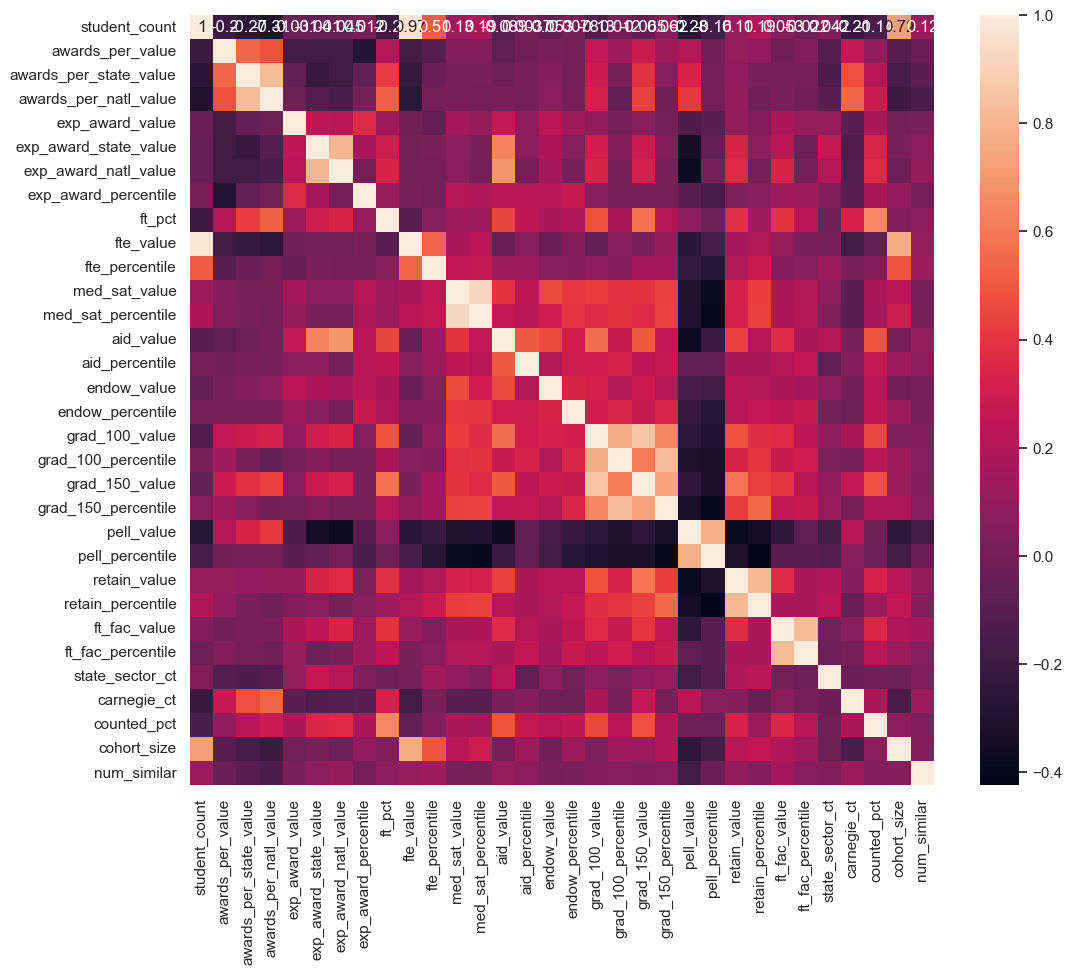

In [30]:
plt.figure(figsize=(12,10))
# Calculate the correlation matrix
corr_matrix = df_num.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show();

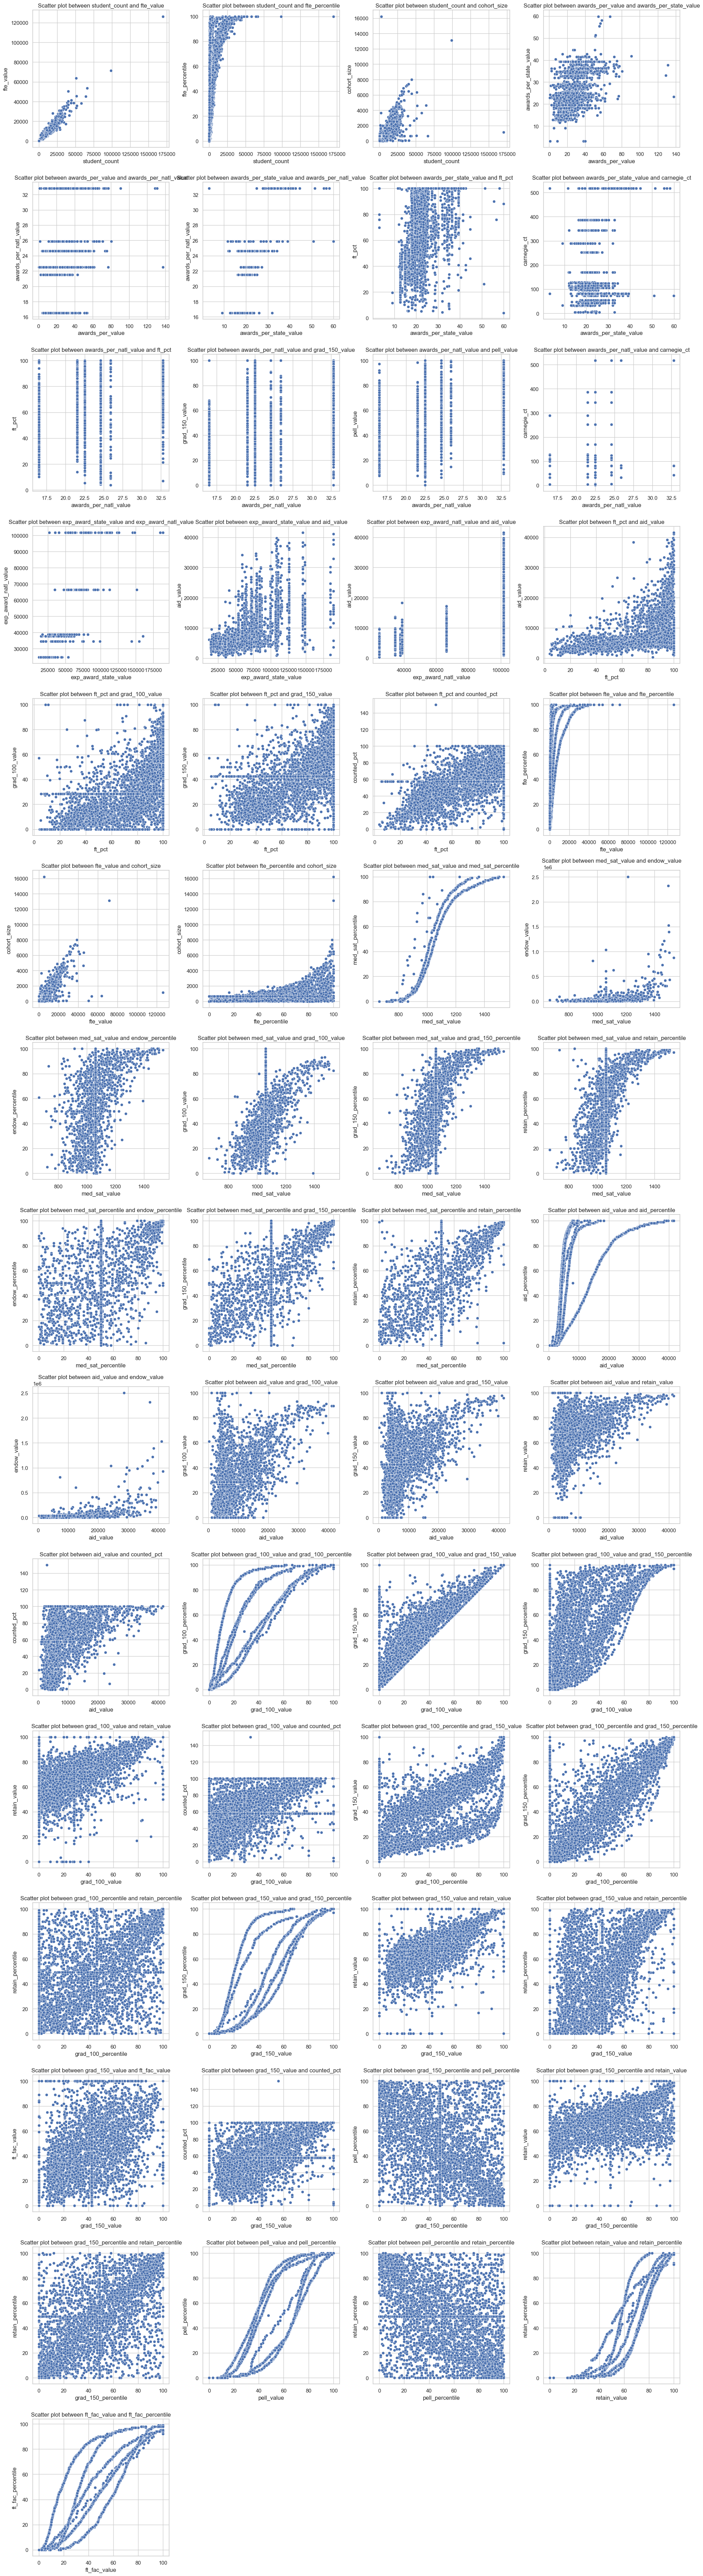

In [31]:
# Create a mask to display only the upper triangle
mask = (abs(corr_matrix) >= 0.4) & (corr_matrix != 1) #Filter corr below 0.4 and self-correlations

# Find pairs of columns with correlation >= 0.4
high_corr_pairs = [(corr_matrix.index[i], corr_matrix.columns[j]) 
                   for i in range(len(corr_matrix)) 
                   for j in range(i+1, len(corr_matrix)) 
                   if mask.iloc[i, j]]

# Calculate the number of rows needed to display 4 pairplots
num_rows = (len(high_corr_pairs) + (4 - 1)) // 4

# Plot scatter plots for these pairs
fig, axs = plt.subplots(num_rows, 4, figsize=(20, 5 * num_rows))

# Flatten the axs array if there's more than one row
if num_rows > 1:
    axs = axs.flatten()

for i, pair in enumerate(high_corr_pairs):
    sns.scatterplot(x=df_num[pair[0]], y=df_num[pair[1]], ax=axs[i])
    axs[i].set_title(f'Scatter plot between {pair[0]} and {pair[1]}')
    axs[i].set_xlabel(pair[0])
    axs[i].set_ylabel(pair[1])

# Remove any unused subplots
for j in range(i + 1, num_rows * 4):
    fig.delaxes(axs[j])
#Display the plots
plt.tight_layout()
plt.show();

### Outliers

- The scatter plots above indicate the presence of outliers on several features. Outliers can have a big influence of statistical analyses and machine learning developments. Read more at (https://careerfoundry.com/en/blog/data-analytics/how-to-find-outliers/). 
- I will us the most common, IQR method, to handle outliers.

In [32]:
df_num.shape

(3798, 32)

#### The Dependent Variable

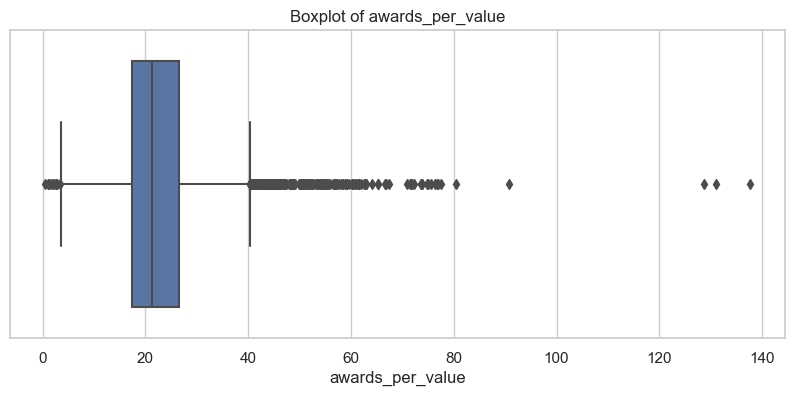

In [33]:
#Create a boxplot
plt.figure(figsize=(10, 4))
sns.boxplot(x=df_num['awards_per_value'])
plt.title('Boxplot of awards_per_value')
plt.show();

In [34]:
num_awards_more_than_80 = data[data['awards_per_value'] >= 80]
print(num_awards_more_than_80[['chronname', 'awards_per_value']].to_string(index=False))

                                 chronname  awards_per_value
      Samaritan Hospital School of Nursing              80.4
West Virginia Business College at Wheeling             128.7
                         Parker University             137.6
     Pinnacle Career Institute at Lawrence              90.8
                   North Central Institute             131.1


- At Samaritan, a private not-for-profit college, 86% of tudents receive grant or scholarship aid (https://www.usnews.com/education/community-colleges/samaritan-hospital-school-of-nursing-CC12993).
- At Wheeling, 100% of the students received financial aid. It was a private for profit institution that closed down in 2017 (https://www.communitycollegereview.com/west-virginia-business-college-wheeling-profile).
- At Parker, 92% of the students received financial aid through grants or loans (https://datausa.io/profile/university/parker-university).
- At Lawrence, between 66 -70% of students received financial aid through loans and grants. A for profit institution. (https://datausa.io/profile/university/pinnacle-career-institute-lawrence).
- At North Central, a private for profit college, 33% of students receive grant or scholarship aid. (https://www.usnews.com/education/community-colleges/north-central-institute-CC17071)

In [35]:
#Define a function to drop outliers based on IQR method
def drop_outliers_iqr(df):
    """Returns a DataFrame with outliers removed"""
    def filter_outliers(col):
        q1 = col.quantile(0.25)
        q3 = col.quantile(0.75)
        IQR = q3 - q1
        lower = q1 - 1.5 * IQR
        upper = q3 + 1.5 * IQR
        return col[(col >= lower) & (col <= upper)]
    #Create a DataFrame by negating outliers
    cleaned_df = df.apply(filter_outliers)
    #Drop NaN rows
    return cleaned_df

**I will drop outliers using the function above, from all numeric columns.**

In [36]:
clean_df = drop_outliers_iqr(df_num)

In [37]:
print(clean_df.shape)

(3798, 32)


In [38]:
clean_df.isna().sum()

student_count              385
awards_per_value           266
awards_per_state_value     485
awards_per_natl_value     1391
exp_award_value            218
exp_award_state_value      141
exp_award_natl_value         0
exp_award_percentile         0
ft_pct                       0
fte_value                  381
fte_percentile               0
med_sat_value             1337
med_sat_percentile        1337
aid_value                  373
aid_percentile               0
endow_value                182
endow_percentile           632
grad_100_value              48
grad_100_percentile          0
grad_150_value               0
grad_150_percentile          0
pell_value                   0
pell_percentile              0
retain_value                75
retain_percentile            0
ft_fac_value                 0
ft_fac_percentile            0
state_sector_ct            229
carnegie_ct                  0
counted_pct                  1
cohort_size                362
num_similar                219
dtype: i

**After removing outliers, there were more NaN elements, indicating the original value was an outliers, do I impute these values again? how will data be impacted?

#### Combined DataFrames: Non-numeric/Numeric  Features

In [39]:
df2 = pd.concat([df, clean_df], axis=1)
print(df2.head(2))

                             chronname        city    state   level control  \
0               Alabama A&M University      Normal  Alabama  4-year  Public   
1  University of Alabama at Birmingham  Birmingham  Alabama  4-year  Public   

                                               basic hbcu flagship  \
0  Masters Colleges and Universities--larger prog...  yes       no   
1  Research Universities--very high research acti...   no       no   

   student_count  awards_per_value  ...  pell_percentile  retain_value  \
0         4051.0              14.2  ...             98.0          63.1   
1        11502.0              20.9  ...             39.0          80.2   

   retain_percentile  ft_fac_value  ft_fac_percentile  state_sector_ct  \
0               17.0          82.8               89.0             13.0   
1               70.0          92.4               98.0             13.0   

   carnegie_ct  counted_pct  cohort_size  num_similar  
0          386         99.7        882.0         

### Save data to a csv file

In [41]:
df2.to_csv('collegedata_EDAd.csv', index=False)

print("DataFrame saved to 'collegedata_EDAd.csv'")

DataFrame saved to 'collegedata_EDAd.csv'


## Summary